Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)
Installation

    If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
    If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install



In [2]:
import tensorflow 
tensorflow.__version__

'2.11.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the data

In this notebook, we will be working with fashion mnist data set: https://www.kaggle.com/datasets/zalando-research/fashionmnist

    60,000 train images
    10,000 test images
    image size (28,28)

Labels

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

The data set is balanced!

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

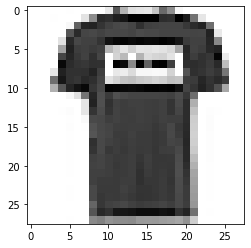

In [9]:
plt.imshow(x_train[1],cmap='Greys')
plt.show()

In [10]:
y_train[1]

0

There are two ways we can handle the target variable:

    Using one-hot encoding + categorical_crossentropy loss function
    Using integer labels + sparse_categorical_crossentropy loss function.

When it comes to multi-class classification, it may not make a big difference whether you use integer labels or one-hot encoded labels, as long as the model is able to learn to predict the correct class. However, there are several benefits to using one-hot encoding for categorical variables in general:

    No implied ordering
    Better generalization: One-hot encoding can lead to better generalization to new data because it allows the model to learn more distinct boundaries between the classes. With integer labels, the model may be tempted to interpolate between adjacent classes, which can lead to overfitting on the training data.
    Easier to interpret: One-hot encoding provides a clear and interpretable representation of the classes. Each class is represented by a binary vector, where each element corresponds to a different class. 

In [11]:
y_train.shape

(60000,)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train_ohe=to_categorical(y_train,num_classes=10)
y_train_ohe.shape

(60000, 10)

In [13]:
# alternative way to do one hot encoding
import tensorflow as tf
y_test_ohe=tf.one_hot(y_test,depth=10)
y_test_ohe.shape

TensorShape([10000, 10])

Creating an ANN model as benchmark

let's start by an ANN model and see how we can improve that. We are not trying to optimize the ANN model, so let's do a quick sequential approach.

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
print(f'Train set shape is:{x_train.shape}')
print(f'Test set shape is:{x_test.shape}')

Train set shape is:(60000, 28, 28)
Test set shape is:(10000, 28, 28)


In [16]:
# we need to flatten images and pass it to a FCN. 
x_train_ann=x_train.reshape(60000,28*28)
x_train_ann=x_train_ann/255
x_test_ann=x_test.reshape(10000,28*28)
x_test_ann=x_test_ann/255

In [17]:
x_train_ann.shape

(60000, 784)

In [18]:
#input layer
ann_model=keras.Sequential(name='ann_mnist')
ann_model.add(layers.Input(shape=(784,))) # this is the shape of each sample! 
ann_model.add(layers.Dense(units=512,activation='relu',name='first_layer'))
#output layer
ann_model.add(layers.Dense(units=10,activation='softmax',name='output_layer'))

In [19]:
ann_model.summary()

Model: "ann_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
#params 
784*512+512

401920

In [21]:
512*10+10

5130

In [22]:
ann_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelcheckpoint=ModelCheckpoint(filepath='ANN_benchmark.keras',save_best_only=True,monitor='val_loss')
callback_list=[modelcheckpoint]

In [24]:
ann_model.fit(x_train_ann, y_train_ohe, validation_data=(x_test_ann, y_test_ohe), epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 [==============================] - 6s 4ms/step - loss: 0.5550 - accuracy: 0.8020 - val_loss: 0.4614 - val_accuracy: 0.8334
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3856 - accuracy: 0.8604 - val_loss: 0.4698 - val_accuracy: 0.8198
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3416 - accuracy: 0.8743 - val_loss: 0.3656 - val_accuracy: 0.8707
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3122 - accuracy: 0.8846 - val_loss: 0.3438 - val_accuracy: 0.8778
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2939 - accuracy: 0.8912 - val_loss: 0.3627 - val_accuracy: 0.8714
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2802 - accuracy: 0.8968 - val_loss: 0.3420 - val_accuracy: 0.8755
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2651 - accuracy: 0.9011 - val_loss: 0.3972 - val_accuracy: 0.8629
Epoch 

In [25]:
test_model=keras.models.load_model('ANN_benchmark.keras')
test_model.evaluate(x_test_ann,y_test_ohe)

313/313 [==============================] - 2s 4ms/step - loss: 0.3293 - accuracy: 0.8859


[0.32932624220848083, 0.8859000205993652]

ANN accuracy in the test set is around 89%. We want to see how CNN improves this accuracy. 

Convolutional Neural Networks (CNN)

In [26]:
# reshaping 
x_train.shape

(60000, 28, 28)

In [27]:
x_train=x_train.reshape(60000,28,28,1)

In [28]:
x_train=x_train/255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test/255

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

Creating a CNN model:

This is the benchmark CNN we build. No regularization (no drop out or data augmentation)

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
# we will be using functional api
def CNN_builder():
  inputs=keras.Input(shape=(28,28,1),name='Input layer')
  x= layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',name='conv_layer_1')(inputs)
  x=layers.MaxPool2D(pool_size=2,name='pooling_1')(x)
  x=layers.Conv2D(filters=64,kernel_size=3,activation='relu',name='conv_layer_2')(x)
  x=layers.MaxPool2D(pool_size=2,name='pooling_2')(x)
  x=layers.Conv2D(filters=128,kernel_size=3,activation='relu',name='conv_layer_3')(x)
  x=layers.Flatten(name='flattening_layer')(x)
  outputs=layers.Dense(units=10,activation='softmax',name='output_layer')(x)
  model=keras.Model(inputs=inputs,outputs=outputs,name='my_first_CNN_model')
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [33]:
model=CNN_builder()
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [34]:
# params
1*(3*3)*32 + 32 

320

In [35]:
32*(3*3)*64+64

18496

In [36]:
64*(3*3)*128+128

73856

In [37]:
3*3*128

1152

In [38]:
1152*10+10

11530

output shape:

    channels are the number of filters
    new size = floor(nold+2p−fs+1)
    each pooling will half the width and height



In [39]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32) 
np.floor(((28+0-3)/1)+1)

26.0

Model fit

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelcheckpoint=ModelCheckpoint(filepath='CNN_basic.keras',save_best_only=True,monitor='val_loss')
callback_list=[modelcheckpoint]

In [41]:
history=model.fit(x=x_train,y=y_train_ohe,validation_data=(x_test,y_test_ohe),epochs=20,batch_size=128,callbacks=callback_list)

Epoch 1/20
469/469 [==============================] - 11s 7ms/step - loss: 0.5903 - accuracy: 0.7839 - val_loss: 0.4175 - val_accuracy: 0.8523
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3594 - accuracy: 0.8691 - val_loss: 0.3762 - val_accuracy: 0.8626
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3082 - accuracy: 0.8869 - val_loss: 0.3257 - val_accuracy: 0.8799
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2749 - accuracy: 0.9000 - val_loss: 0.2920 - val_accuracy: 0.8917
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2507 - accuracy: 0.9094 - val_loss: 0.2729 - val_accuracy: 0.9041
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2296 - accuracy: 0.9164 - val_loss: 0.2726 - val_accuracy: 0.9049
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2137 - accuracy: 0.9219 - val_loss: 0.2679 - val_accuracy: 0.9007
Epoch

In [42]:
test_model=keras.models.load_model('CNN_basic.keras')
test_model.evaluate(x_test,y_test_ohe)

313/313 [==============================] - 1s 3ms/step - loss: 0.2507 - accuracy: 0.9125


[0.2506980895996094, 0.9125000238418579]

As you can see, the CNN performs better in the test set with 91% accuracy.

Model evaluation

In [43]:
model.metrics_names

['loss', 'accuracy']

In [44]:
metrics=pd.DataFrame(history.history)

In [45]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.590289,0.783933,0.417485,0.8523
1,0.359360,0.869117,0.376226,0.8626
2,0.308174,0.886933,0.325699,0.8799
3,0.274868,0.899983,0.291995,0.8917
4,0.250737,0.909400,0.272930,0.9041


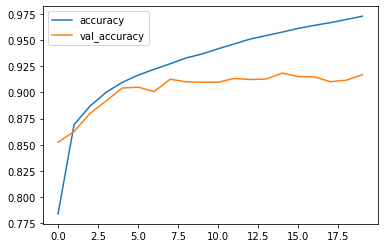

In [46]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

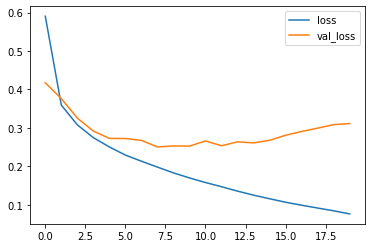

In [47]:
metrics[['loss','val_loss']].plot()
plt.show()

Data Augmentation

We will be using Data augmentation as a regularization technique to avoid overfitting caused by having too few samples to learn from. In Keras, this can be done by adding a number of data augmentation layers at the start of your model.

image augmentation layers in keras!

Note: ImageDataGenerator is deprecated in tensorflow 2.1: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [59]:
data_augmentation=keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        #layers.RandomRotation(0.1),
        #layers.RandomZoom(0.2),
    ]
)

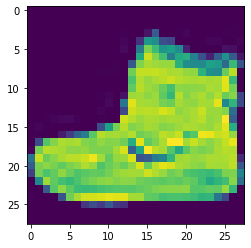

In [49]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [50]:
image=x_train[0]
image.shape

(28, 28, 1)

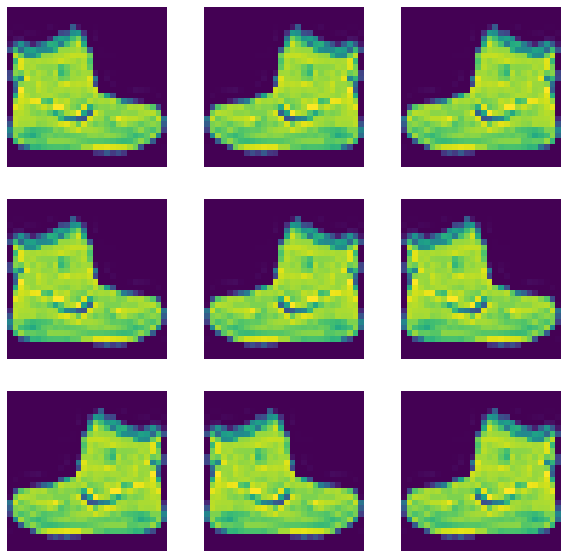

In [51]:
plt.figure(figsize=(10,10))
for i in range(9):
  augmented_images=data_augmentation(image)
  ax=plt.subplot(3,3,i+1)
  plt.imshow(augmented_images.numpy().reshape(28,28))
  plt.axis('off')

In [52]:
x= data_augmentation(x_train)
x.shape

TensorShape([60000, 28, 28])

In [53]:
x=tf.expand_dims(x,axis=-1)
x.shape

TensorShape([60000, 28, 28, 1])

In [54]:
x=tf.squeeze(x,axis=-1)
x.shape

TensorShape([60000, 28, 28])

In [55]:
def CNN_builder_augmented():
  inputs= keras.Input(shape=(28,28,1), name='Input layer')
  x = data_augmentation(inputs)
  x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
  x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
  x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
  x = layers.Flatten(name="flattening_layer")(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

  model = keras.Model(inputs= inputs , outputs=outputs, name='CNN_augmented_model')
  
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model 

In [60]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()
# if you got an incompatible shape error in the first conv layer, this is because you are using the augmented data. Try using different augmentation techniques or use the original data. 

Model: "CNN_augmented_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128) 

In [61]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()

Model: "CNN_augmented_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128) 

Model fit

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelcheckpoint = ModelCheckpoint(filepath='CNN_augmented.keras',save_best_only=True,monitor='val_loss')
callback_list=[modelcheckpoint]

In [63]:
history=model_augmented.fit(x=x_train,y=y_train_ohe,validation_data=(x_test,y_test_ohe),epochs=20,batch_size=128,callbacks=callback_list)

Epoch 1/20
469/469 [==============================] - 20s 40ms/step - loss: 0.6409 - accuracy: 0.7643 - val_loss: 0.4365 - val_accuracy: 0.8408
Epoch 2/20
469/469 [==============================] - 20s 43ms/step - loss: 0.4102 - accuracy: 0.8498 - val_loss: 0.3703 - val_accuracy: 0.8684
Epoch 3/20
469/469 [==============================] - 21s 46ms/step - loss: 0.3546 - accuracy: 0.8715 - val_loss: 0.3481 - val_accuracy: 0.8717
Epoch 4/20
469/469 [==============================] - 26s 56ms/step - loss: 0.3221 - accuracy: 0.8820 - val_loss: 0.3311 - val_accuracy: 0.8797
Epoch 5/20
469/469 [==============================] - 33s 71ms/step - loss: 0.3010 - accuracy: 0.8898 - val_loss: 0.2995 - val_accuracy: 0.8903
Epoch 6/20
469/469 [==============================] - 20s 43ms/step - loss: 0.2807 - accuracy: 0.8978 - val_loss: 0.2857 - val_accuracy: 0.8957
Epoch 7/20
469/469 [==============================] - 26s 56ms/step - loss: 0.2676 - accuracy: 0.9019 - val_loss: 0.2771 - val_accuracy:

For this dataset, the data augmentation was not that helpful because of multiple reasons:

    The original train set is not that small (60k images)
    very low resolution and centered data!
    we added the drop out layer to avoid overfitting, this means that we need to run the model for more epochs (50 at least).

Besides, it is not efficient to do data augmentation like this! because we are not taking advantage of GPU computation. In the next notebook, I show you how to do data augmentation using batches for a small dataset.


Model evaluation

In [64]:
metrics=pd.DataFrame(history.history)

In [65]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.640859,0.764317,0.436470,0.8408
1,0.410242,0.849767,0.370314,0.8684
2,0.354647,0.871450,0.348125,0.8717
3,0.322106,0.882033,0.331099,0.8797
4,0.301003,0.889833,0.299507,0.8903


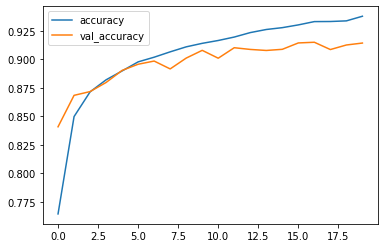

In [66]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

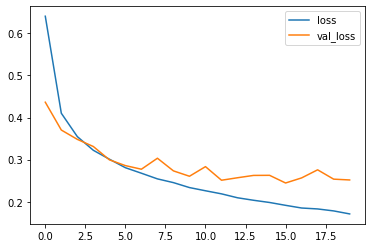

In [67]:
metrics[['loss','val_loss']].plot()
plt.show()

these plots suggest that we should let the model run for more epochs! 

Model predictions

In [68]:
model=keras.models.load_model('CNN_basic.keras')

In [69]:
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [70]:
prediction_prob=model.predict(x_test)
prediction_prob[0]

313/313 [==============================] - 1s 3ms/step


array([2.8291508e-08, 6.8580830e-10, 8.1411927e-10, 1.9705805e-08,
       5.9038452e-10, 1.7046522e-04, 3.8120507e-09, 6.2899117e-04,
       9.9640938e-06, 9.9919051e-01], dtype=float32)

In [71]:
prediction_prob[0].argmax()

9

In [57]:
y_test[0]

9

let's generate prediction classes:

    For binary classification, np.where(y_pred > threshold, 1,0)
    For multiclass classification, np.argmax(predictions, axis=1)

https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead


In [74]:
predictions=np.argmax(prediction_prob,axis=1)
predictions[0:5]

array([9, 2, 1, 1, 6])

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.84      0.89      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [77]:
confusion_matrix(y_test,predictions)

array([[845,   0,  19,  22,   4,   0, 103,   0,   7,   0],
       [  2, 974,   1,  15,   3,   0,   2,   0,   3,   0],
       [ 16,   0, 888,   8,  44,   0,  43,   0,   1,   0],
       [ 11,   1,   7, 929,  31,   0,  17,   0,   4,   0],
       [  2,   0,  60,  19, 881,   0,  36,   0,   2,   0],
       [  0,   0,   0,   0,   0, 969,   0,  22,   0,   9],
       [ 87,   0,  78,  26,  81,   0, 716,   0,  12,   0],
       [  0,   0,   0,   0,   0,   5,   0, 983,   0,  12],
       [  2,   0,   3,   4,   3,   1,   2,   2, 983,   0],
       [  1,   0,   0,   0,   0,   3,   0,  39,   0, 957]])

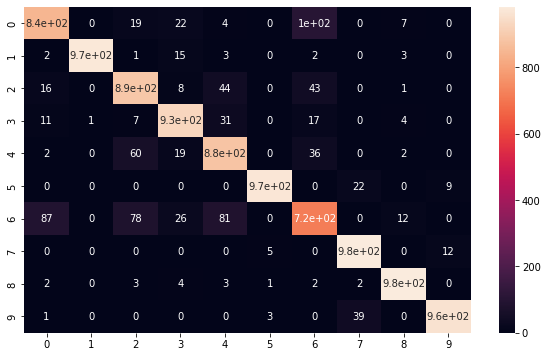

In [78]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

it seems that our basic CNN model has hard time distinguishing T-shirt, Shirts, pullover, dress and coat which makes sense. 

Recall: Labels

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot



Let's look into some of the misclassified images!

In [79]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [80]:
misclassified_images=[i for i,x in enumerate (y_test!=predictions)if x==True]

In [81]:
misclassified_images[:9]

[21, 23, 25, 27, 42, 44, 49, 57, 66]

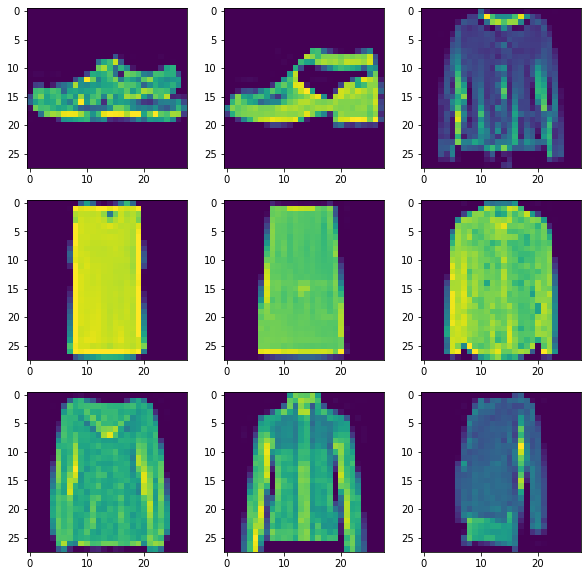

In [82]:
plt.figure(figsize=(10,10))
actuals=[]
for i, number in enumerate(misclassified_images[:9]):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()  

In [83]:
list(predictions[misclassified_images[:9]])

[7, 5, 2, 6, 6, 4, 6, 6, 6]

In [84]:
actuals

[5, 9, 4, 0, 3, 6, 2, 4, 2]

Recall: Labels

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot



Done